<a href="https://colab.research.google.com/github/gilesitorr/Estadistica_Avanzada/blob/main/Parcial_2/Examen/EA_parcial2_examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Estadística Avanzada__
# Parcial 2 - Examen
## _Gil Estéfano Rodríguez Rivera_

Todas las bases de datos utilizadas así como el desarrollo se encuentra en _GitHub_ en https://github.com/gilesitorr/Estadistica_Avanzada/tree/main/Parcial_2/Examen

__Nota:__ En este Notebook se usó el kernel de R, aunque la extensión sea ipynb.

In [1]:
# Antes de comenzar, se importan las librerías a usar
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Biostatistics: A Foundation for Analysis in the Health Sciences
### Wayne W. Daniel & Chad L. Cross

### 9.3.6

Evans et al., examinaron el efecto de la velocidad sobre las fuerzas de reacción del suelo (GRF) en perros con cojera por un ligamento cruzado craneal desgarrado. Los perros se caminaron y trotaron sobre una plataforma de fuerza y se registró el GRF (en newtons) durante la fase de apoyo. La siguiente tabla contiene 22 medidas de fuerza expresadas como la media de cinco medidas de fuerza por perro al caminar y la media de cinco medidas de fuerza por perro al trotar.

Utilice el valor de GRF al caminar para predecir el valor de GRF al trotar. Además, para el valor de 𝑋 = 29.4

(b) Construya y grafique el intervalo de confianza al 95 % para 𝜇𝑦|𝑥

(c) Construya y grafique el intervalo de predicción al 95 % para 𝑌.

In [2]:
# Se lee el dataset desde el url
url <- "https://github.com/gilesitorr/Estadistica_Avanzada/raw/main/Parcial_2/Examen/EXR_C09_S03_06.csv"
df <- read.csv(url, header=TRUE)

In [3]:
# Se hace el ajuste lineal
ajuste <- lm(TROT~WALK, data=df)

A continuación se muestran __los intervalos de confianza y de predicción__ del 95% para WALK=29.4 .

El valor predicho es Y=38.4341

El intervalo de confianza es (36.1883, 40.6799)

El intervalo de predicción es (27.8060, 49.0621)

In [4]:
predict(ajuste, data.frame(WALK=29.4), interval="confidence", level=0.95)

,fit,lwr,upr
1,38.43408,36.18825,40.67991


In [5]:
predict(ajuste, data.frame(WALK=29.4), interval="prediction", level=0.95)

,fit,lwr,upr
1,38.43408,27.80602,49.06213


En la siguiente __gráfica__ se muestran los datos del estudio como puntos de color rojo.

La recta negra es el ajuste realizado.

Las rectas punteadas azules muestran el intervalo de confianza del 95% el ajuste.

Las rectas punteadas rojas muestran el intervalo de predicción del 95% el ajuste.

La rectas punteada vertical verde indica el valor X=29.4, de modo que su intersección con las otras rectas representa de manera gráfica los valores mencionados anteriormente.

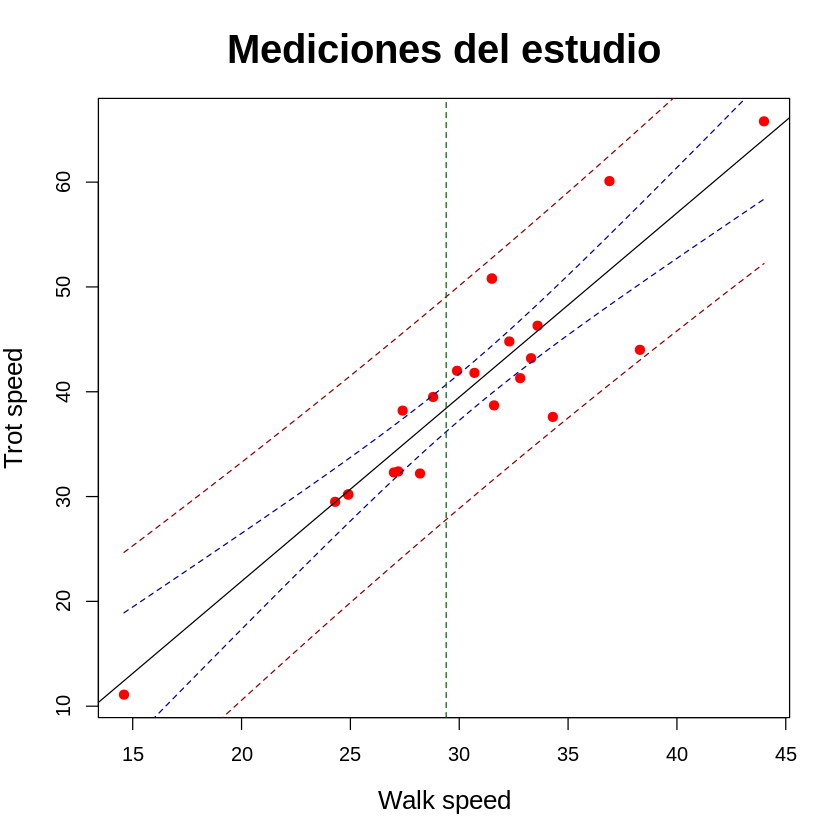

In [6]:
# Se realiza el scatter plot
newx = seq(min(df$WALK),max(df$WALK),by = 0.05)
conf_interval <- predict(ajuste, newdata=data.frame(WALK=newx), interval="confidence",
                         level = 0.95)
pred_interval <- predict(ajuste, newdata=data.frame(WALK=newx), interval="prediction",
                         level = 0.95)

plot(x=df$WALK, y=df$TROT, xlab="Walk speed", ylab="Trot speed",
     main="Mediciones del estudio", col="red", pch=19, cex.lab=1.3, cex.main=2)

abline(ajuste, col="black")
matlines(newx, conf_interval[,2:3], col = "darkblue", lty=2)
matlines(newx, pred_interval[,2:3], col = "darkred", lty=2)

abline(v = 29.4, col = "darkgreen", lty=2)

### 11

As part of a study to investigate the relationship between stress and certain other variables, the following data were collected on a simple random sample of 15 corporate executives.

(a) Find the least-squares regression equation for these data.

(b) Construct the analysis of variance table and test the null hypothesis of no relationship among the five variables.

(c) Test the null hypothesis that each slope in the regression model is equal to zero.

(d) Find the multiple coefficient of determination and the multiple correlation coefficient.

Let a=0.05 and find the p value for each test.

In [7]:
# Se lee el dataset desde el url
url <- "https://github.com/gilesitorr/Estadistica_Avanzada/raw/main/Parcial_2/Examen/REV_C10_11.csv"
df <- read.csv(url, header=TRUE)

In [8]:
# Se hace el ajuste lineal
ajuste <- lm(Y~X1+X2+X3+X4, data=df)

In [9]:
summary(ajuste)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.462 -17.109   2.376  12.886  39.515 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -126.50532   32.28107  -3.919  0.00287 **
X1             0.17629    0.04009   4.397  0.00134 **
X2            -1.56295    2.01205  -0.777  0.45526   
X3             1.57454    0.44567   3.533  0.00542 **
X4             1.62929    0.62872   2.591  0.02688 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.03 on 10 degrees of freedom
Multiple R-squared:  0.8424,	Adjusted R-squared:  0.7794 
F-statistic: 13.37 on 4 and 10 DF,  p-value: 0.0005064


Del summary del ajuste se puede inferir lo siguiente:

(a) La __recta ajustada por mínimos cuadrados__ es:

$Y = 0.1763X_1 - 1.5630X_2 + 1.5745X_3 + 1.6293X_4 - 126.5053$

(c) Individualmente, puede verse que el t-statistic de cada uno de los términos del ajuste. De esos t-statistics, puede verse que, estadísticamente, se tiene evidencia de que todas las pendientes -salvo la pendiente de $X_2$, que tiene un p-value de 0.4553- son diferentes de cero, con una significancia de 0.05.

(d) El coeficiente de correlación múltiple del ajuste es $R^2=0.8424$

(b) El p-value del análisis de varianza de la regresión es de 0.0005. Lo que indica que, para una significancia de 0.05, hay evidencia estadísticamente significativa para afirmar que hay relación entre las variables del ajuste.

A continuación se muestran las tablas del análisis de varianza a detalle. De la primera tabla pueden obtenerse los 10 grados de libertad de los residuales más los 4 de las variables. A partir de la columna Sum Sq se obtiene el F-statistic. En la segunda tabla, en el valor promedio del F-value, se observa el F-statistic. Con los grados de libertad y el F-statistic, se obtiene el p-value.

In [10]:
anova(ajuste)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,14159.02617,14159.02617,24.518081,0.0005771866
X2,1,94.66157,94.66157,0.163918,0.6940994742
X3,1,12741.57521,12741.57521,22.063592,0.0008451619
X4,1,3878.20461,3878.20461,6.715584,0.0268832525
Residuals,10,5774.93245,577.49324,NA,NA


In [11]:
summary(anova(ajuste))

       Df           Sum Sq            Mean Sq            F value       
 Min.   : 1.0   Min.   :   94.66   Min.   :   94.66   Min.   : 0.1639  
 1st Qu.: 1.0   1st Qu.: 3878.20   1st Qu.:  577.49   1st Qu.: 5.0777  
 Median : 1.0   Median : 5774.93   Median : 3878.20   Median :14.3896  
 Mean   : 2.8   Mean   : 7329.68   Mean   : 6290.19   Mean   :13.3653  
 3rd Qu.: 1.0   3rd Qu.:12741.58   3rd Qu.:12741.58   3rd Qu.:22.6772  
 Max.   :10.0   Max.   :14159.03   Max.   :14159.03   Max.   :24.5181  
                                                      NA's   :1        
     Pr(>F)         
 Min.   :0.0005772  
 1st Qu.:0.0007782  
 Median :0.0138642  
 Mean   :0.1806013  
 3rd Qu.:0.1936873  
 Max.   :0.6940995  
 NA's   :1          

### 12.3.3

La hoja frontal de los registros de los pacientes mantenidos en un departamento de salud local contiene 10 entradas. Una muestra de 100 registros reveló la siguiente distribución de entradas erróneas:

Pruebe la bondad de ajuste de estos datos a la distribución binomial con 𝑝 = 0.20.

Encuentre el valor 𝑝 para esta prueba.

In [12]:
# Los datos
labels <- c(0, 1, 2, 3, 4, 7.5)
limits <- c(0, 1, 2, 3, 4, 10)
values <- c(8, 25, 32, 24, 10, 1)

# El tamaño de la muestra
numero <- sum(values)

# El número de entradas es de 10, por lo que en nuestra distribución
# binomial de ajuste, se define n=10
n <- 10

# Se usa que el promedio de la distribución binomial es igual al número de
# entradas n por la probabilidad de ocurrencia p
(mean <- sum(labels*values/numero))
(p <- mean/n)

# Se calcula la distribución de frecuencias esperadas
esperadas <- numero*(dbinom(limits, size=n, prob=p))
esperadas[length(limits)] <- numero*(1-pbinom(4, size=n, prob=p))
esperadas

[1] 2.085

[1] 0.2085

[1]  9.649597 25.419344 30.132279 21.166832  9.757736  3.874212

In [13]:
# Se calcula el estadístico de prueba
diferencias <- (values-esperadas)**2/esperadas
(chi_2 <- sum(diferencias))

[1] 2.922247

In [14]:
# Se calcula el p-value
# En los grados de libertad se considera la restricción de que se calcula
# "a mano" el parámetro de la distribución
pchisq(chi_2, length(values)-2, lower.tail = FALSE)

[1] 0.5709203

Con un p-value de 0.5709, no se puede rechazar la hipótesis nula de que la muestra agrupada sigue una distribución binomial con parámetros $n=10$ y $\hat{p}=0.2085$.

### 16

A simple random sample of normal subjects between the ages of 6 and 18 yielded the data on total body potassium (mEq) and total body water (liters) shown in the following table. Let total potassium be the dependent variable and use dummy variable coding to quantify the qualitative variable.

Analyze the data using regression techniques. Explain the results. Plot the original data and the fitted regression equations.

In [15]:
# Se lee el dataset desde el url
url <- "https://github.com/gilesitorr/Estadistica_Avanzada/raw/main/Parcial_2/Examen/REV_C11_16.csv"
df <- read.csv(url, header=TRUE)

In [16]:
# Se codifica como dummy variable el método
# NOTA
# Male es SEX=1
# Female es SEX=0
df$SEX.Number <- ifelse(df$SEX=="M", 1, 0)
df$SEX.Factor <- as.factor(df$SEX.Number)

In [17]:
# Se hace una regresión lineal
ajuste <- lm(WATER~POTAS+SEX.Number, data=df)
summary(ajuste)


Call:
lm(formula = WATER ~ POTAS + SEX.Number, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5411 -1.0033  0.2269  1.5072  4.5144 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.6730072  1.4239975   1.877   0.0727 .  
POTAS        0.0110989  0.0008336  13.315 1.41e-12 ***
SEX.Number  -0.7569283  1.0522752  -0.719   0.4789    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.604 on 24 degrees of freedom
Multiple R-squared:  0.8875,	Adjusted R-squared:  0.8781 
F-statistic: 94.65 on 2 and 24 DF,  p-value: 4.115e-12


Con un análisis de varianza puede notarse que el ajuste sí describe el fenómeno, con un p-value de $\sim10^{-12}$. Sin embargo, individualmente, la pendiente asociada a la variable del sexo no cuenta con evidencia suficiente que sugiera que es diferente de cero (p-value=0.4789).

Esto implica que el sexo no es un factor determinante en la cantidad total de agua en el cuerpo.

La conclusión anterior se refuerza con un análisis de regresión a pasos.

In [18]:
# Se define el modelo donde sólo se ajusta la intersección de la recta
interseccion <- lm(WATER ~ 1, data=df)

# Se define el modelo donde se consideran todas las variables independientes
completo <- lm(WATER ~ ., data=df)

# Se hace regresión stepwise con la función "step" de R
stepwise <- step(interseccion, direction='both', scope=formula(completo), trace=0)

In [19]:
# La regresión obtenida con un análisis paso a paso
summary(stepwise)


Call:
lm(formula = WATER ~ POTAS, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1719 -1.1214  0.0464  1.6398  4.8826 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.6119644  1.4076806   1.856   0.0754 .  
POTAS       0.0109176  0.0007869  13.875 3.01e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.579 on 25 degrees of freedom
Multiple R-squared:  0.8851,	Adjusted R-squared:  0.8805 
F-statistic: 192.5 on 1 and 25 DF,  p-value: 3.012e-13


Como se mencionó, el análsis paso a paso sólo refuerza que el sexo no es un factor determinante al describir la cantidad de agua en un cuerpo. Sólo el potasio es determinante en este estudio.

A continuación se muestra la gráfica con la regresión que incluye el sexo. Los puntos y rectas rojas corresponden a los sujetos masculinos y los puntos y rectas negras corresponden a los sujetos femeninos.

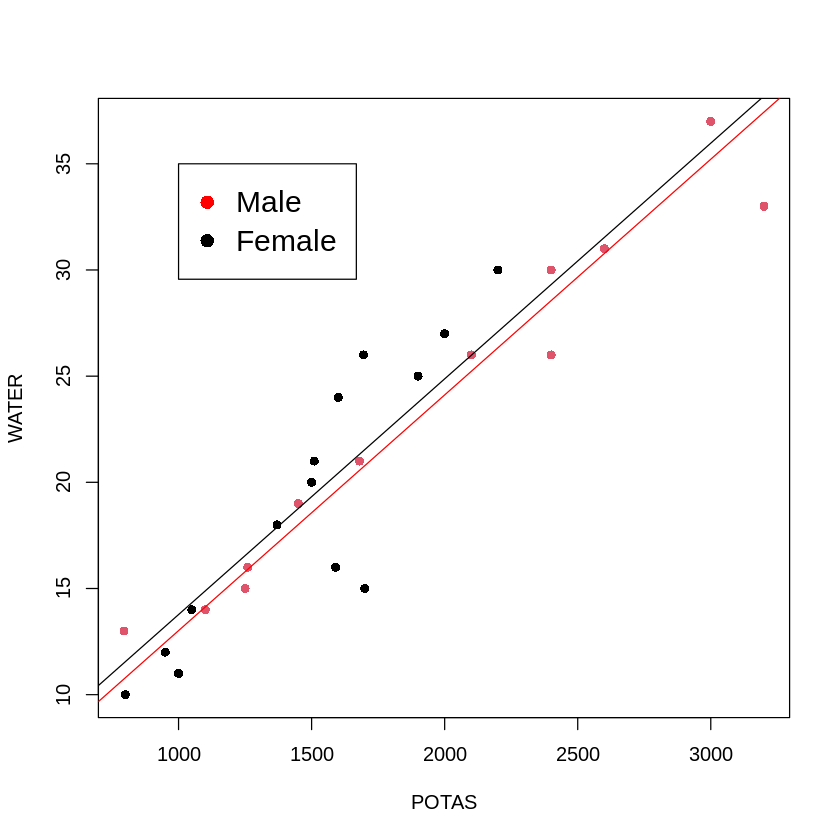

In [20]:
# Se hace la gráfica y se pone un color distinto para cada sexo
with(df, plot(POTAS, WATER, col = SEX.Factor, pch=16))
legend(1000, 35, legend=c("Male", "Female"),
       col=c("red", "black"), pch=c(16,16), cex=1.5)

abline(a=2.6730-0.7569, b=0.0111, col="red")
abline(a=2.6730, b=0.0111, col="black")

A continuación se muestra la gráfica con cada la regresión que no incluye el sexo.

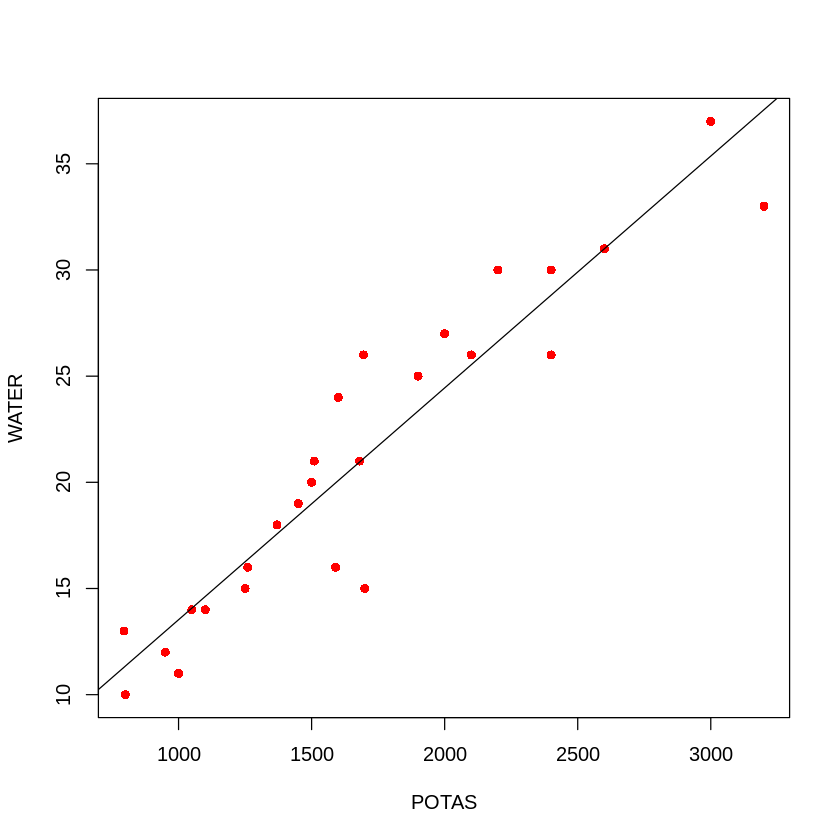

In [21]:
# Se hace la gráfica y se ajusta la recta producida con análisis
# stepwise
with(df, plot(POTAS, WATER, pch=16, col="red"))

abline(a=2.6119644, b=0.0109176)